# Video Game Genre Project

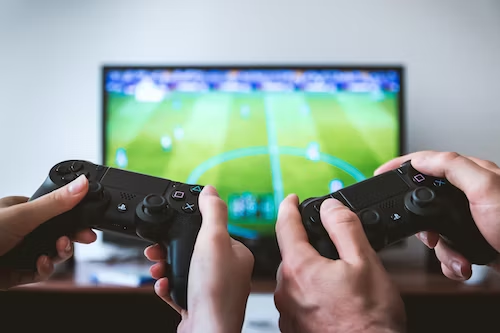

**Sample project to analyze video game release data between 2012-2015.**

**Exploration and visualization of games released by genre.**

**Reviewing the profitability and variations of specific genres.** 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp

In [2]:
# Split source data into two CSV files in SQL to add and merge via python

names = pd.read_csv('game_names.csv')
genres = pd.read_csv('game_genres.csv')

print(names.head(5))
print(genres.head(5))

   id_number  year_release                                          game_name
0      16574          2013         Grisaia no Kajitsu: La Fruit de la Grisaia
1      16570          2014  Fujiko F. Fujio Characters: Great Assembly! Sl...
2      16569          2012                                     End of Nations
3      16568          2015                                          Teslagrad
4      16563          2014                                  Hanasaku Manimani
   id_number      publisher_name      genre  global_sales
0      16574           Prototype  Adventure          0.01
1      16570  Namco Bandai Games     Action          0.01
2      16569        Trion Worlds   Strategy          0.01
3      16568          Rain Games   Platform          0.01
4      16563                 5pb  Adventure          0.01


In [3]:
# Merge both data frames on the 'id_number' column
game_list = names.merge(genres, how='inner', on='id_number')

# Update 'id_number' and 'year_release' columns to integers
game_list.year_release = game_list.year_release.astype('int')
game_list.id_number = game_list.id_number.astype('int')

print(game_list.head(5))

   id_number  year_release                                          game_name  \
0      16574          2013         Grisaia no Kajitsu: La Fruit de la Grisaia   
1      16570          2014  Fujiko F. Fujio Characters: Great Assembly! Sl...   
2      16569          2012                                     End of Nations   
3      16568          2015                                          Teslagrad   
4      16563          2014                                  Hanasaku Manimani   

       publisher_name      genre  global_sales  
0           Prototype  Adventure          0.01  
1  Namco Bandai Games     Action          0.01  
2        Trion Worlds   Strategy          0.01  
3          Rain Games   Platform          0.01  
4                 5pb  Adventure          0.01  


In [4]:
# Review Genre column to identity the number of unique genres and their names  
genre_list = game_list['genre'].unique()
genre_count = len(genre_list)
genre_names = ', '.join(genre_list)

print('There are ' + str(genre_count) + ' different genre categories included in the database including: ' +  str(genre_names))

There are 12 different genre categories included in the database including: Adventure, Action, Strategy, Platform, Role-Playing, Misc, Puzzle, Fighting, Simulation, Shooter, Racing, Sports


In [5]:
# Calculate amount of games released in each genre
game_list.genre.value_counts() 

Action          465
Role-Playing    223
Adventure       171
Misc            110
Sports           83
Shooter          72
Fighting         49
Simulation       48
Strategy         47
Platform         41
Racing           37
Puzzle           24
Name: genre, dtype: int64

In [6]:
# Calculate amount of games released in each year
game_list.year_release.value_counts()

2012    416
2015    355
2013    304
2014    295
Name: year_release, dtype: int64

In [7]:
# Group data by year
games_by_year = game_list.groupby(game_list.year_release)

#Create groups to split data for analysis by year
games_2012 = games_by_year.get_group(2012)
games_2013 = games_by_year.get_group(2013)
games_2014 = games_by_year.get_group(2014)
games_2015 = games_by_year.get_group(2015)

#Test Group 
print(games_2012.tail(4))

      id_number  year_release                   game_name  \
1362         74          2012   Animal Crossing: New Leaf   
1363         66          2012                      Halo 4   
1364         65          2012     New Super Mario Bros. 2   
1367         35          2012  Call of Duty: Black Ops II   

              publisher_name       genre  global_sales  
1362                Nintendo  Simulation          9.09  
1363  Microsoft Game Studios     Shooter          9.76  
1364                Nintendo    Platform          9.82  
1367              Activision     Shooter         29.72  


In [8]:
# Function to identify games earning target amount in target year
def profit(df, amount, year):
    count = df[df['global_sales'] >= amount].shape[0]
    print(f"{count} games earned {amount} million or more in global sales during {year}.")

# Run function for each year for target amounts of 1 million and 10 million 
profit(games_2012, 1, 2012)
profit(games_2013, 1, 2013)
profit(games_2014, 1, 2014)
profit(games_2015, 1, 2015)
profit(games_2012, 10, 2012)
profit(games_2013, 10, 2013)
profit(games_2014, 10, 2014)
profit(games_2015, 10, 2015)

82 games earned 1 million or more in global sales during 2012.
71 games earned 1 million or more in global sales during 2013.
66 games earned 1 million or more in global sales during 2014.
67 games earned 1 million or more in global sales during 2015.
4 games earned 10 million or more in global sales during 2012.
7 games earned 10 million or more in global sales during 2013.
7 games earned 10 million or more in global sales during 2014.
5 games earned 10 million or more in global sales during 2015.


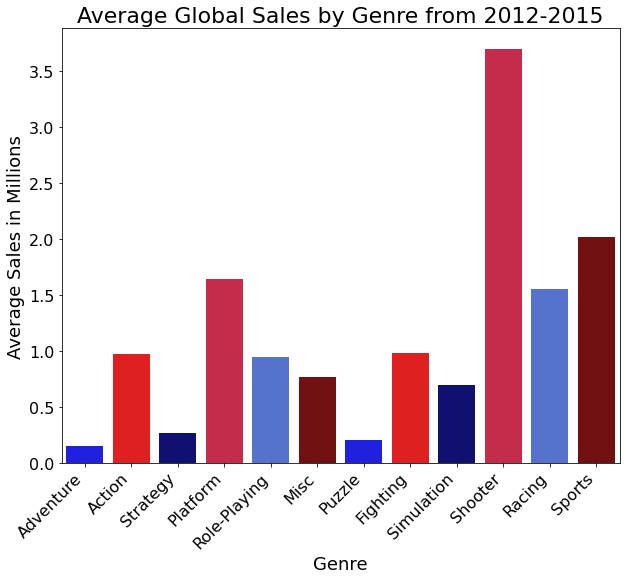

In [9]:
# Create bar graph to represent average global sales in millions by genre 

plt.figure(figsize=(10, 8))

# Remove confidence interval lines and alternate shades of red and blue for readability 

sns.barplot(x='genre', y='global_sales', data=game_list, ci=None, palette=['blue', 'red',  
                                                                           'navy', 'crimson', 
                                                                           'royalblue', 'maroon'])

# Add labels and increase font size

plt.title("Average Global Sales by Genre from 2012-2015", fontsize=22)
plt.ylabel("Average Sales in Millions", fontsize=18)
plt.xlabel("Genre", fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=16)

# Shift and slant x-axis labels
plt.xticks(fontsize=16, rotation=45, ha='right')
plt.show()

In [10]:
# Function to compare number of releases by genre across years
def genre_compare(genre_1, genre_2):
    plt.figure(figsize=(10, 8))
    
    # Create list of each target genre
    genre_1_list = game_list[game_list['genre'] == genre_1]
    genre_2_list = game_list[game_list['genre'] == genre_2]

    # Count the releases in each year
    genre_1_counts = genre_1_list['year_release'].value_counts().sort_index()
    genre_2_counts = genre_2_list['year_release'].value_counts().sort_index()
    
    # Identify comparison years
    years = sorted(game_list['year_release'].unique())
    
    # Width and positions of the bars
    bar_width = 0.35
    bar_positions_1 = np.arange(len(years))
    bar_positions_2 = bar_positions_1 + bar_width
    
    # Create bar plots for each genre
    plt.bar(bar_positions_1, genre_1_counts, label=genre_1, width=bar_width)
    plt.bar(bar_positions_2, genre_2_counts, label=genre_2, width=bar_width)    
    
    # Set x-axis tick positions, font sizes, labels, legend
    plt.xticks(bar_positions_1 + bar_width / 2, years, fontsize=14)
    plt.xlabel('Year', fontsize=13)
    plt.ylabel('# of Games Releases', fontsize=13)
    plt.title('Comparing ' + genre_1 + ' and ' + genre_2 + ' Genres from 2012 to 2015', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.show()

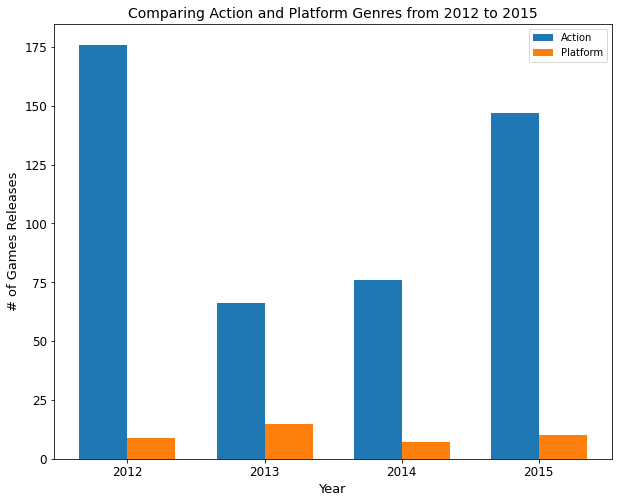

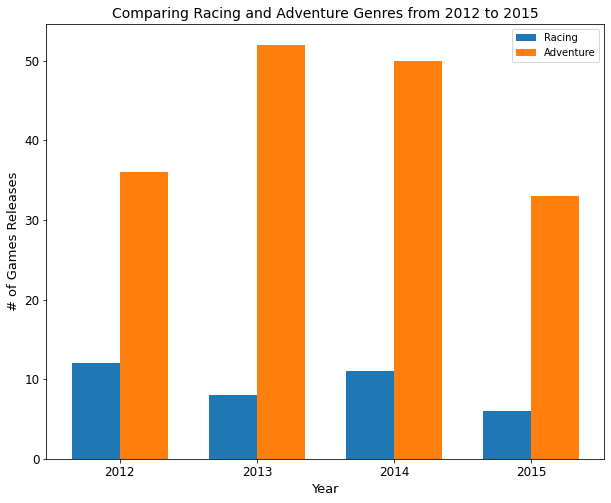

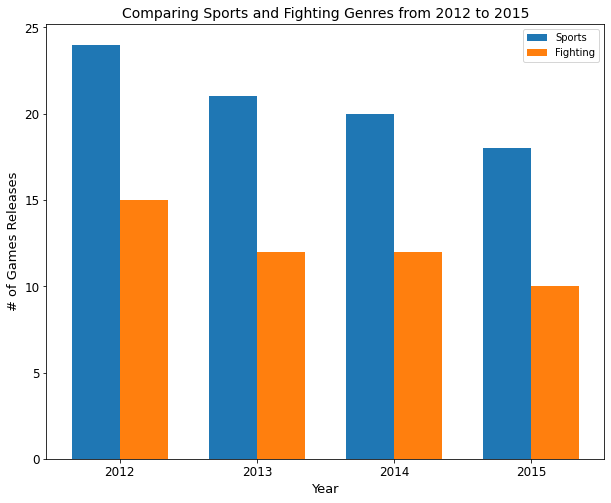

In [11]:
genre_compare('Action', 'Platform')
genre_compare('Racing', 'Adventure')
genre_compare('Sports', 'Fighting')

In [12]:
# Group the data by genre and calculate the mean sales for each genre
genre_average_sales = game_list.groupby('genre')['global_sales'].mean().reset_index()

# Calculate the mean and standard deviation of the sales across all genres
mean_sales = genre_average_sales['global_sales'].mean()
std_sales = genre_average_sales['global_sales'].std()

# Print Averages by Genre, Total Mean, and Total Standard Deviation. 
print(genre_average_sales.to_string(index=False))
print('Average of Sales by Genre = ' + str(round(mean_sales, 2)))
print('Standard Deviation of Sales by Genre  = ' + str(round(std_sales, 2)))

       genre  global_sales
      Action      0.973333
   Adventure      0.151111
    Fighting      0.988367
        Misc      0.766455
    Platform      1.648049
      Puzzle      0.208750
      Racing      1.560000
Role-Playing      0.952466
     Shooter      3.695694
  Simulation      0.697083
      Sports      2.018434
    Strategy      0.273830
Average of Sales by Genre = 1.16
Standard Deviation of Sales by Genre  = 0.99


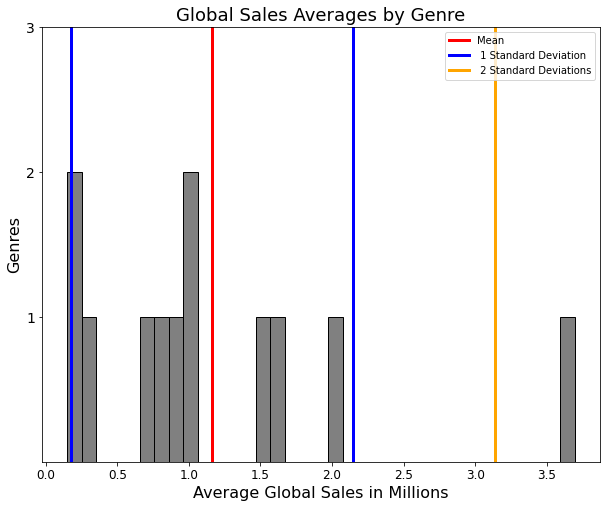

In [13]:
# Create histogram of the average global sales for each genre
plt.figure(figsize=(10, 8))
plt.hist(genre_average_sales['global_sales'], bins=35, edgecolor='black', color='grey')

# Add axis labels and a title
plt.xlabel('Average Global Sales in Millions', fontsize=16)
plt.ylabel('Genres', fontsize=16)
plt.title('Global Sales Averages by Genre', fontsize=18)

# Add a vertical line to represent the mean
plt.axvline(mean_sales, color='red', linestyle='solid', linewidth=3, label='Mean')

# Add vertical lines for the standard deviations 
plt.axvline(mean_sales + std_sales, color='blue', linestyle='solid', linewidth=3, label=' 1 Standard Deviation')
plt.axvline(mean_sales - std_sales, color='blue', linestyle='solid', linewidth=3)
plt.axvline(mean_sales + std_sales * 2, color='orange', linestyle='solid', linewidth=3, label=' 2 Standard Deviations')

# Adjust axis ticks
plt.yticks([1, 2, 3], fontsize=14)
plt.xticks(fontsize=12)

plt.legend()
plt.show()

In [14]:
# Fuction to recreate genre histogram and identify specific genre score
def plot_genre_sales_histogram(genre_name):
    # Create a histogram of global sales averages by genre
    plt.figure(figsize=(10, 8))
    plt.hist(genre_average_sales['global_sales'], bins=35, edgecolor='black', color='grey')

    # Add labels and a title to the histogram
    plt.xlabel('Average Global Sales in Millions', fontsize=16)
    plt.ylabel('Genres', fontsize=16)
    plt.title('Global Sales Averages by Genre', fontsize=18)

    # Add a vertical line to represent the mean
    plt.axvline(mean_sales, color='red', linestyle='solid', linewidth=3, label='Mean')

    # Add a vertical lines or the standard deviation 
    plt.axvline(mean_sales + std_sales, color='blue', linestyle='solid', linewidth=3, label=' 1 Standard Deviation')
    plt.axvline(mean_sales - std_sales, color='blue', linestyle='solid', linewidth=3)
    plt.axvline(mean_sales + std_sales * 2, color='orange', linestyle='solid', linewidth=3, label=' 2 Standard Deviations')
    
    # Calculate average sales for the target genre
    genre_sales = genre_average_sales[genre_average_sales['genre'] == genre_name]['global_sales'].values[0]

    # Add a line for the target genre
    plt.axvline(genre_sales, color='purple', linestyle='solid', linewidth=3, label= str(genre_name) + ' Sales')

    # Adjust axis ticks
    plt.yticks([1, 2, 3], fontsize=14)
    plt.xticks(fontsize=12)

    
    plt.legend()
    plt.show()

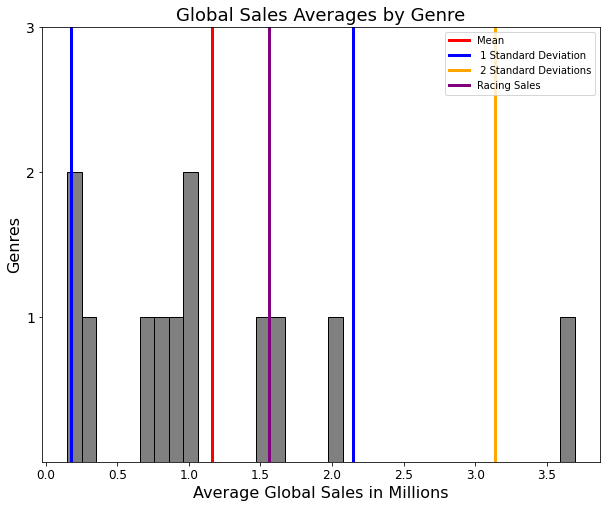

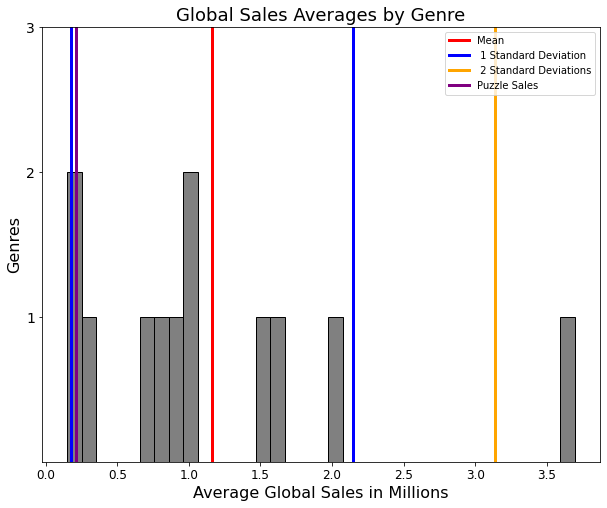

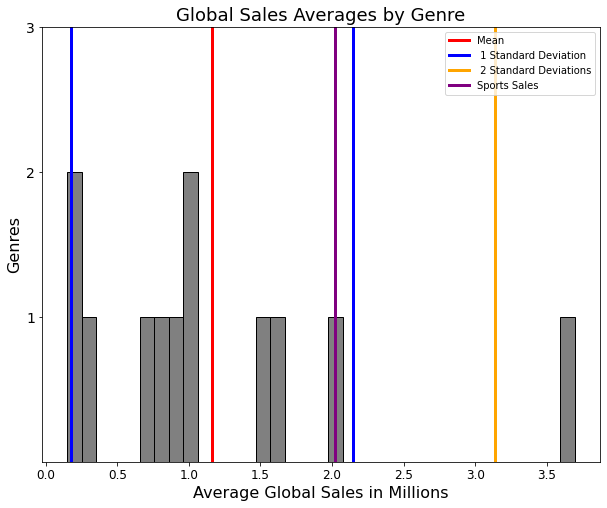

In [15]:
# Run function across different genres
plot_genre_sales_histogram('Racing')
plot_genre_sales_histogram('Puzzle')
plot_genre_sales_histogram('Sports')

In [16]:
def genre_t_test(genre):
    # Collect sample data for the target genre
    genre_sales = game_list[game_list['genre'] == genre]['global_sales']
    genre_sales_mean = round(game_list[game_list['genre'] == genre]['global_sales'].mean(), 2)
    
    # Perform the one-sample t-test
    t_statistic, p_value = ttest_1samp(genre_sales, mean_sales)
    
    # Return a statement on the significant difference of the sample
    if p_value < 0.01:
        outcome = str(genre) + ' games earned an average of ' + str(genre_sales_mean) + ' million per game, which is significantly different from other genres.'
    else:
        outcome = str(genre) + ' games earned an average of ' + str(genre_sales_mean) + ' million per game, which is not significantly different from other genres.'
    
    return outcome

In [17]:
# Run and print one-sample t-test for each genre
print(genre_t_test('Action'))
print(genre_t_test('Role-Playing'))
print(genre_t_test('Adventure'))
print(genre_t_test('Misc'))
print(genre_t_test('Sports'))
print(genre_t_test('Shooter'))
print(genre_t_test('Fighting'))
print(genre_t_test('Simulation'))
print(genre_t_test('Strategy'))
print(genre_t_test('Platform'))
print(genre_t_test('Racing'))
print(genre_t_test('Puzzle'))

Action games earned an average of 0.97 million per game, which is not significantly different from other genres.
Role-Playing games earned an average of 0.95 million per game, which is not significantly different from other genres.
Adventure games earned an average of 0.15 million per game, which is significantly different from other genres.
Misc games earned an average of 0.77 million per game, which is not significantly different from other genres.
Sports games earned an average of 2.02 million per game, which is not significantly different from other genres.
Shooter games earned an average of 3.7 million per game, which is significantly different from other genres.
Fighting games earned an average of 0.99 million per game, which is not significantly different from other genres.
Simulation games earned an average of 0.7 million per game, which is not significantly different from other genres.
Strategy games earned an average of 0.27 million per game, which is significantly different 

The analysis of the video game release data between 2012-2015 led to the following conclusions:

1. Adventure, Shooter, Strategy, and Puzzle genres were all identified as significantly different in Global Sales compared to the overall Global Sales average across genres.

2. Shooter genre was found to be significantly more profitable. This genre included some of the highest-selling games, such as multiple entries in the Call of Duty series. The 'plot_genre_sales_histogram' function shows Shooter games averaged over 1 standard deviation higher than the next highest earning genre, Sports. 

3. Adventure, Strategy, and Puzzle genres were identified as significantly less profitable. Adventure, Strategy, and Puzzle genres had the fewest total game releases during the analyzed time period.

4. Adventure games, while often associated with popular releases, may overlap with action games. Adventure games are characterized by story-driven gameplay, lacking some of the widespread appeal of action games with adventure elements like Assassin's Creed.

5. Strategy games had a limited number of significant releases during the analyzed period, with the highest-earning release being XCOM: Enemy Unknown earning $1.96 million.

6. Puzzle displayed overall low sales numbers per game. It should be noted that the analysis focused on major game console and computer game releases. Further research is needed to determine if earnings data for mobile games and "free-to-play" models differ significantly for this genre.

It is important to note that this analysis is based on a specific time period and limited data. Including additional data and analyzing trends over a larger time scale would provide further insights and a more comprehensive understanding of the gaming industry.

